In [1]:
# Viewing Dataset features and attributes
import os
import pickle
import sys
import numpy as np
from gan import output
import matplotlib.pyplot as plt


sys.modules["output"] = output

# loading data attribute and features format
f1 = open('/Users/rashidkolaghassi/Documents/GitHub/DoppelGANger/data/web/data_feature_output.pkl','rb')
a1 = open('/Users/rashidkolaghassi/Documents/GitHub/DoppelGANger/data/web/data_attribute_output.pkl','rb')


data_feature_outputs=pickle.load(f1)
data_attribute_outputs = pickle.load(a1)
f1.close()
a1.close()

In [2]:
# loading preprocessed wikipedia data
web_train_dat = np.load('/Users/rashidkolaghassi/Documents/GitHub/DoppelGANger/data/web/data_train.npz')
web_test_dat = np.load('/Users/rashidkolaghassi/Documents/GitHub/DoppelGANger/data/web/data_test.npz')
lst = web_train_dat.files
for items in web_train_dat:
    str='{} shape: {}'
    print(str.format(items,np.shape(web_train_dat[items])))

data_gen_flag shape: (50000, 550)
data_attribute shape: (50000, 14)
data_feature shape: (50000, 550, 1)


In [3]:
# Loading synthetic wikipedia data
web_train_synthDat = np.load('/Users/rashidkolaghassi/Documents/GitHub/DoppelGANger/test/generated_samples/epoch_id-399/generated_data_test.npz')
web_test_synthDat = np.load('/Users/rashidkolaghassi/Documents/GitHub/DoppelGANger/test/generated_samples/epoch_id-399/generated_data_train.npz')

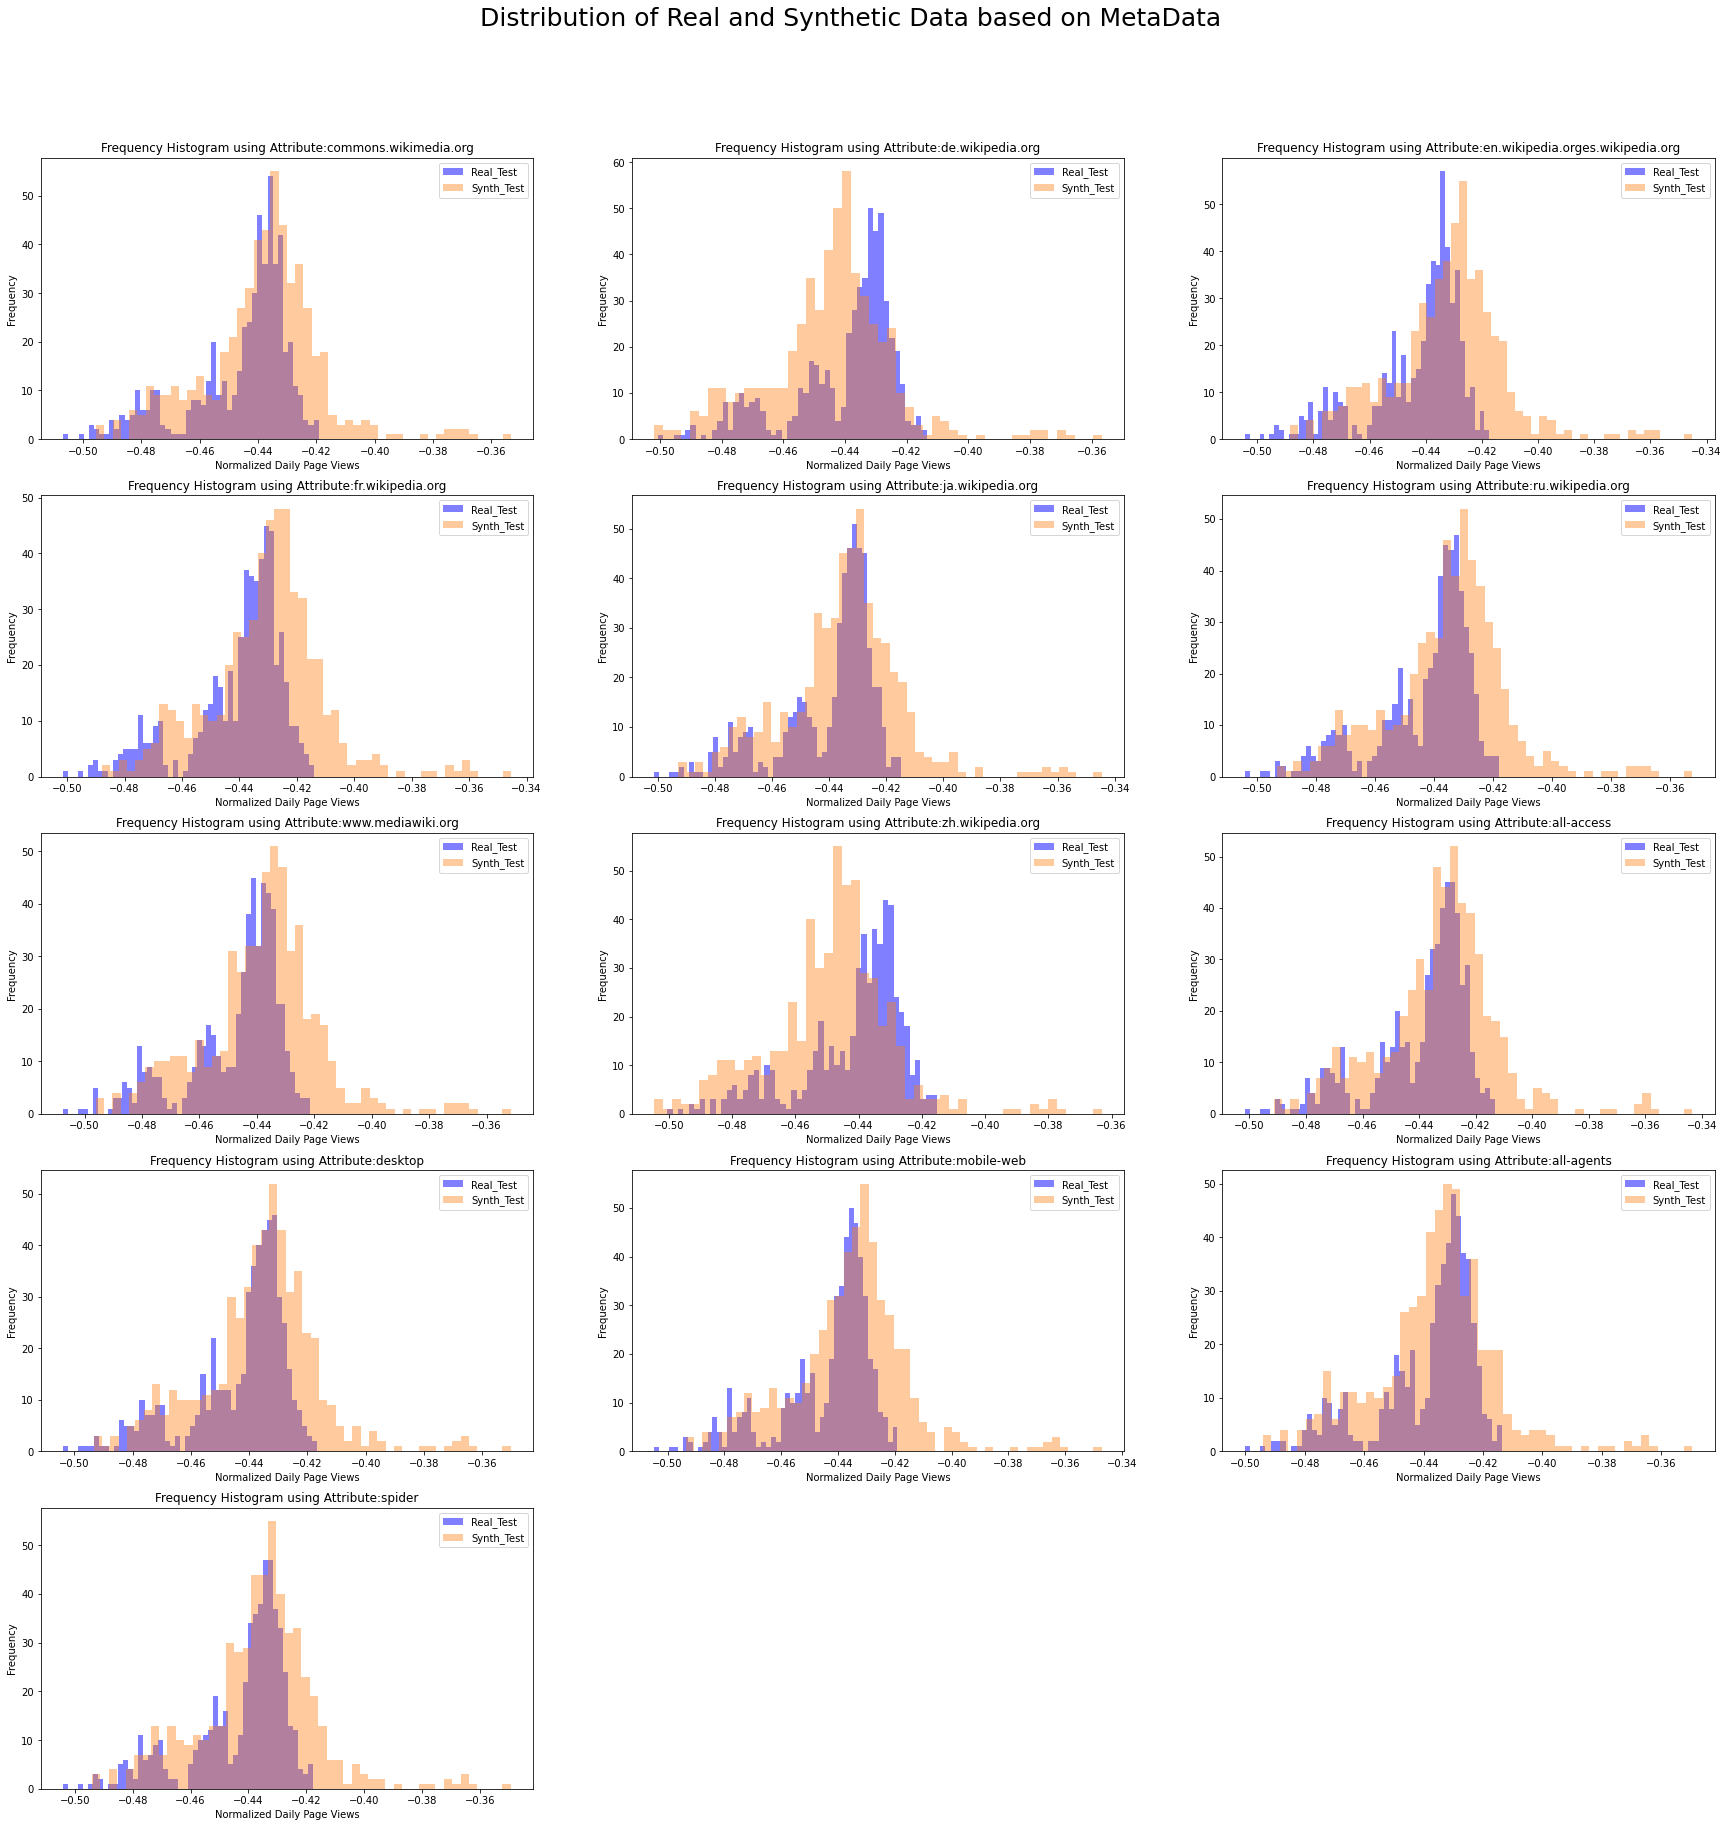

In [14]:
# recording meta-data names
metaData_name = ['commons.wikimedia.org', 'de.wikipedia.org', 'en.wikipedia.org'
                 'es.wikipedia.org', 'fr.wikipedia.org', 'ja.wikipedia.org',
                 'ru.wikipedia.org', 'www.mediawiki.org', 'zh.wikipedia.org',
                 'all-access', 'desktop', 'mobile-web',
                 'all-agents', 'spider']
num_metaData = len(metaData_name)

plt.figure(figsize=(30, 30))
plt.suptitle("Distribution of Real and Synthetic Data based on MetaData", fontsize=25, y=0.95)
#Filtering measruments by metadata
for i in range (0, num_metaData):
    metaData_ind =  np.where(web_train_dat['data_attribute'][:,i]==1)
    
    measurementTrainReal = web_train_dat['data_feature'][metaData_ind[0],:,0]
    measurementTestReal = web_test_dat['data_feature'][metaData_ind[0],:,0]
    measAvgTrainReal = np.average(measurementTrainReal,axis=0);
    measAvgTestReal = np.average(measurementTestReal,axis=0);
    
    measurementTrainSynth = web_train_synthDat['data_feature'][metaData_ind[0],:,0]
    measurementTestSynth = web_test_synthDat['data_feature'][metaData_ind[0],:,0]
    measAvgTrainSynth = np.average(measurementTrainSynth,axis=0);
    measAvgTestSynth = np.average(measurementTestSynth,axis=0);
    
    #plt.figure(i)
    dist = plt.subplot(5,3,i+1);
    plt.hist(measAvgTestReal,color ='b',alpha = 0.5,bins=50,label='Real_Test');
    plt.gca().set(title='Frequency Histogram using Attribute:'+metaData_name[i], ylabel='Frequency',xlabel='Normalized Daily Page Views');
    plt.legend();
    plt.hist(measAvgTestSynth,color ='tab:orange',alpha = 0.4,bins=50,label='Synth_Test');
    plt.legend();
    
    

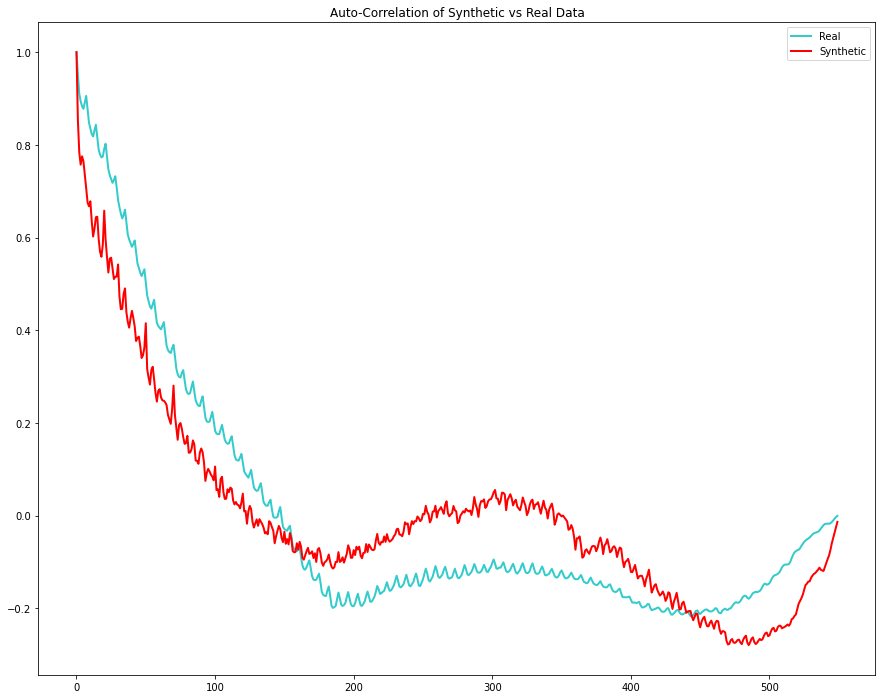

In [38]:
#auto-correlation tests
import statsmodels.api as sm
RealTestMean = np.average(web_test_dat['data_feature'][:,:,0],axis=0)
acorrReal = sm.tsa.acf(RealTestMean, nlags = 550-1)

SynthTestMean = np.average(web_test_synthDat['data_feature'][:,:,0],axis=0)
acorrSynth = sm.tsa.acf(SynthTestMean, nlags = 550-1)
plt.figure(figsize=(15,12))
plt.plot(acorr,color='c',linewidth=2,alpha=0.8,label = "Real");
plt.plot(acorrSynth,color='r',linewidth=2,label = "Synthetic");
plt.legend()
plt.gca().set(title='Auto-Correlation of Synthetic vs Real Data');

